Giving raw data downloaded from this link https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

Base on the data, we will formulate a linear regression model for 'propery crime' and use cross validation to evaluate how fit the model with the expected data. 

In [212]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

In [213]:
df = pd.read_excel(open('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls','rb'), sheetname='13tbl8ny', skiprows = 4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [214]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


The property crime has median = 112.5, 75% crime = 341, mean = 792.6,and max = 141971. Hence, the distribution is right skew. The standard deviation is very big 7659.7. Most of cities have property crime around few hundred, while there are a few cities with very high property crime.
Find which city has the property crime > 3 sigma?

In [215]:
df[df['Property\ncrime']>792.606322 + 3*7659.724746]


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
216,New York,8396126.0,52384.0,335.0,NaN,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN


Rape (revised definition)1 seems missing information in the table. How many rows have no data?

In [216]:
print("There are %d rows and %d columns" %(df.shape[0], df.shape[1]))
df.isnull().sum()

There are 351 rows and 13 columns


City                                        0
Population                                  3
Violent\ncrime                              3
Murder and\nnonnegligent\nmanslaughter      3
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2                 3
Robbery                                     3
Aggravated\nassault                         3
Property\ncrime                             3
Burglary                                    3
Larceny-\ntheft                             3
Motor\nvehicle\ntheft                       3
Arson3                                    164
dtype: int64

In [217]:
df_cp = df.drop(df.columns[[0,4,12]], axis=1)
df_cp = df_cp.dropna()
print(df_cp.shape)
df_cp.isnull().sum()

(348, 10)


Population                                0
Violent\ncrime                            0
Murder and\nnonnegligent\nmanslaughter    0
Rape\n(legacy\ndefinition)2               0
Robbery                                   0
Aggravated\nassault                       0
Property\ncrime                           0
Burglary                                  0
Larceny-\ntheft                           0
Motor\nvehicle\ntheft                     0
dtype: int64

We have crime data of 348 cities. Cities are indexes, and won't be count in the model. We have no data in Rape\n(revised\ndefinition)1 and missing data in Arson3 columns, so we won't count these 2 columns in the model.



Firstly, we want to know whether a relationship exists between 'property crime' and other variables: population, violent crime, ...

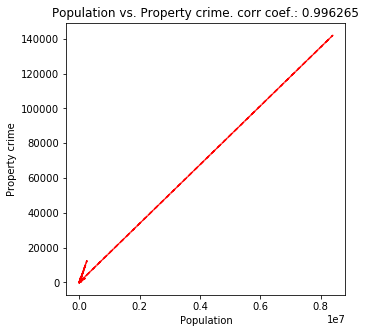

In [218]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df.Population, df[['Property\ncrime']], 'r--')

ax.set_title('Population vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df.Population))
ax.set_xlabel('Population')
ax.set_ylabel('Property crime')
plt.show()

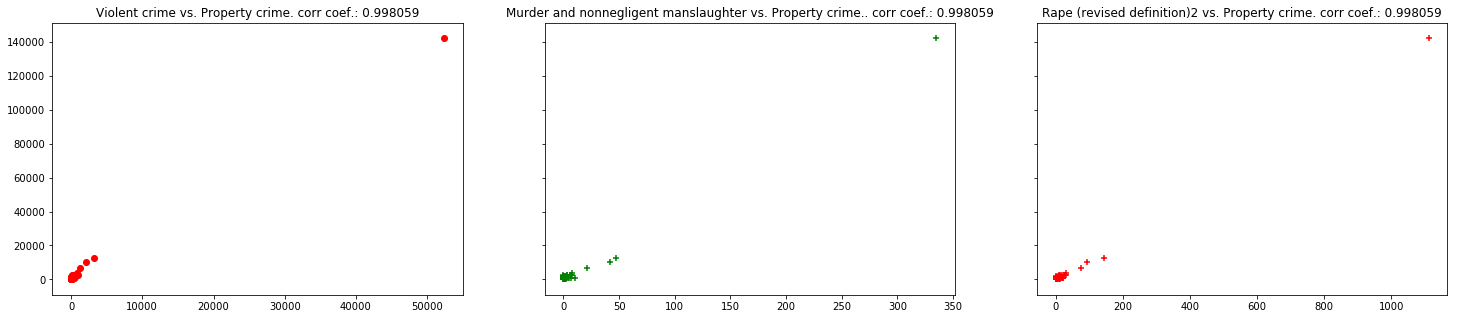

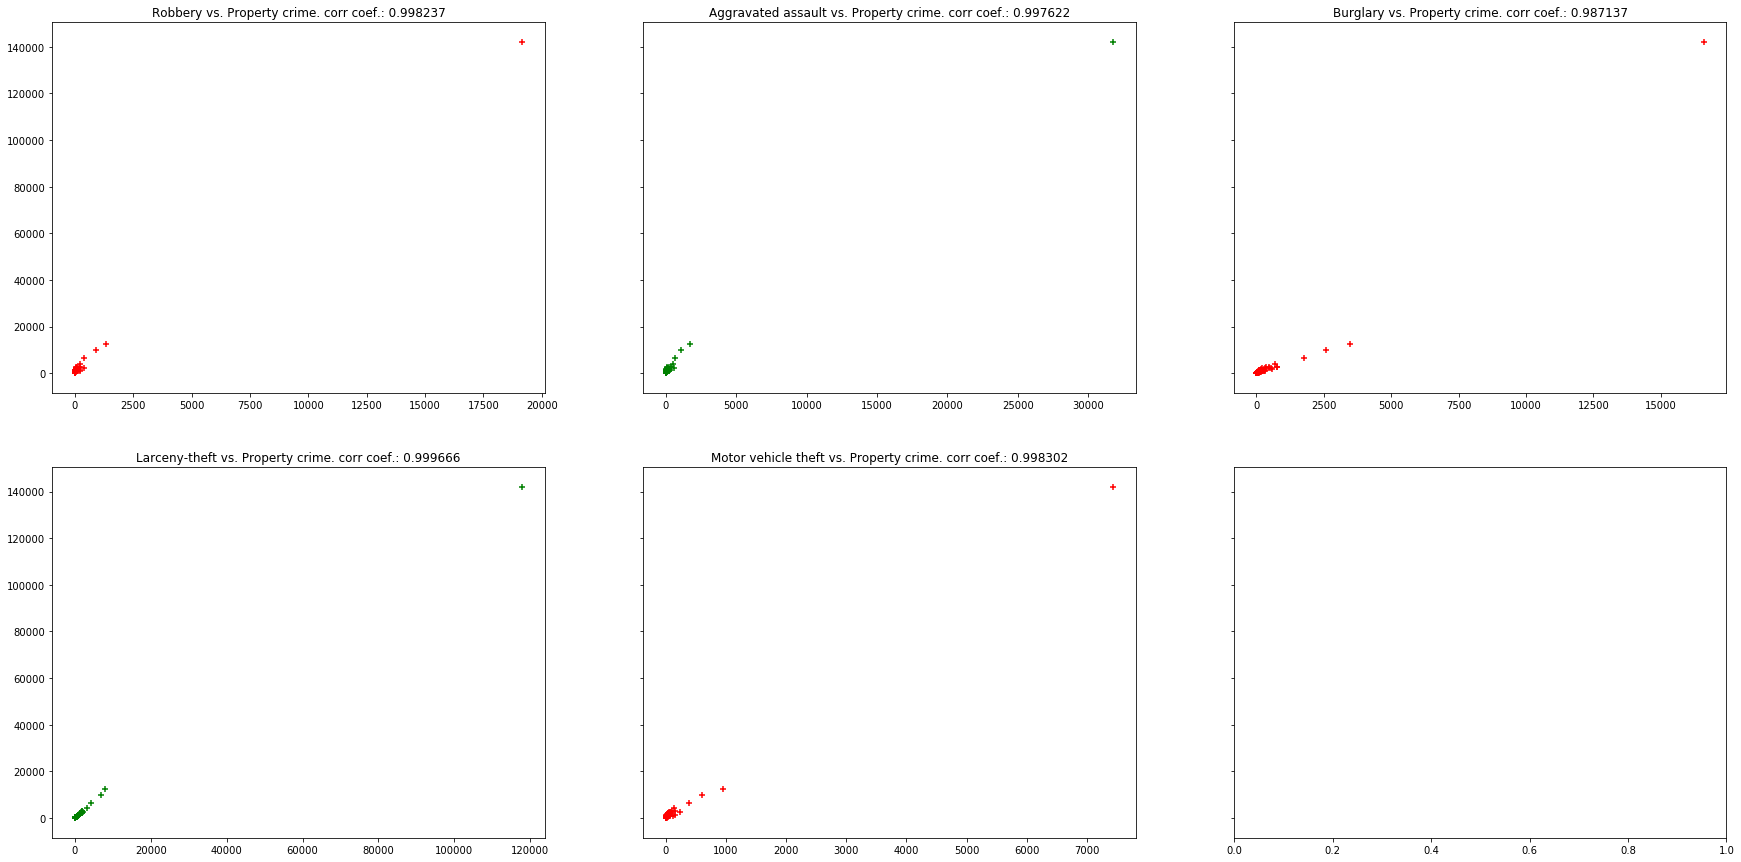

In [219]:
# visualize the relationship between the features and the response using scatterplots

## https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-demo-py
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(25,5))
ax1.scatter(df[['Violent\ncrime']], df[['Property\ncrime']], c='r', marker='o')
ax1.set_title('Violent crime vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df['Violent\ncrime']))

ax2.scatter(df[['Murder and\nnonnegligent\nmanslaughter']], df[['Property\ncrime']], c='g', marker='+')
ax2.set_title('Murder and nonnegligent manslaughter vs. Property crime.. corr coef.: %f' %df['Property\ncrime'].corr(df['Violent\ncrime']))

ax3.scatter(df[['Rape\n(legacy\ndefinition)2']], df[['Property\ncrime']], c='r', marker='+')
ax3.set_title('Rape (revised definition)2 vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df['Violent\ncrime']))

fig, axarr = plt.subplots(2, 3, sharey=True, figsize=(30,15))
axarr[0, 0].scatter(df[['Robbery']], df[['Property\ncrime']], c='r', marker='+')
axarr[0, 0].set_title('Robbery vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df.Robbery))

axarr[0, 1].scatter(df[['Aggravated\nassault']], df[['Property\ncrime']], c='g', marker='+')
axarr[0, 1].set_title('Aggravated assault vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df['Aggravated\nassault']))

axarr[0, 2].scatter(df[['Burglary']], df[['Property\ncrime']], c='r', marker='+')
axarr[0, 2].set_title('Burglary vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df.Burglary))

axarr[1, 0].scatter(df[['Larceny-\ntheft']], df[['Property\ncrime']], c='g', marker='+')
axarr[1, 0].set_title('Larceny-theft vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df['Larceny-\ntheft']))

axarr[1, 1].scatter(df[['Motor\nvehicle\ntheft']], df[['Property\ncrime']], c='r', marker='+')
axarr[1, 1].set_title('Motor vehicle theft vs. Property crime. corr coef.: %f' %df['Property\ncrime'].corr(df['Motor\nvehicle\ntheft']))

plt.show()

From the graph, We can see clearly that all features (population, violent crime, murder, theft..) have strong positive relationship with property crime. We will pick 1 feature, 2 features, and all features as parameters respectivity for 3 models and compare the correctness of the models. 

I want to remove newline characters in the column names 

In [220]:
df_cp.columns 

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object')

In [221]:
import re
df_cp.columns = [re.sub(r'\n|\)|\(|\n\(|-| ', '_', c) for c in df_cp.columns]
df_cp.columns = [re.sub(r'_+', '_', c) for c in df_cp.columns]
df_cp.columns

Index(['Population', 'Violent_crime', 'Murder_and_nonnegligent_manslaughter',
       'Rape_legacy_definition_2', 'Robbery', 'Aggravated_assault',
       'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_vehicle_theft'],
      dtype='object')

<h1>1. Simple Linear Regression</h1>

We will find the formula of Property crime with 1 input 'Population'.

In [236]:
x = df_cp.Population.values.reshape(x.shape[0],1)
y = df_cp.Property_crime
print( df_cp.Population.shape,
       df_cp.Population.values.shape,
       x.shape,    
       x.reshape(348,1).shape,
       y.shape)


(348,) (348,) (348, 1) (348, 1) (348,)


In [223]:
model=lg.fit(x,y)
print ("formula: y = {0}x + {1}".format(model.coef_, model.intercept_))

formula: y = [ 0.01695663]x + 113.70298212788998


<b>Calculate mean square error:</b>

Mean squared error: 436173.35


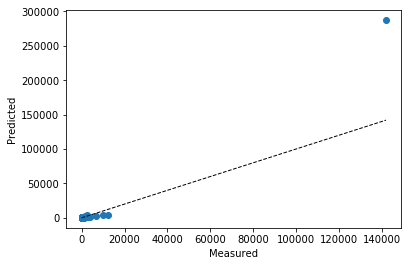

In [224]:
pred=model.predict(x)
print("Mean squared error: %.2f"
      % np.mean((pred - data['Property_crime']) ** 2))
y=data.Property_crime.values
predicted = cross_val_predict(lg, data.Population.values.reshape(data.shape[0],1), data['Property_crime'], cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

The model can fit most of the cases with property crime smaller than 20,000. However, it is bad to predict the property crime at big value, such as 140,000.

<h1> Model2:  Linear for 2 variables: Population + violent </h1>

In [225]:
data = df_cp[['Population', 'Violent_crime', 'Property_crime']]
model=lg.fit(data[['Population', 'Violent_crime']],data['Property_crime'])
print ("Regression formula: y = {0}x + {1}".format(model.coef_, model.intercept_))

formula: y = [-0.004826    3.48607908]x + 283.0525187019688


Adding another factor to the model: Violent crime, we can see that Population affect very little and negatively proportional to the property crime. It seems wrong.

Illustrate the model on the graph:

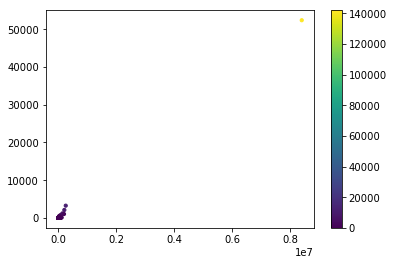

In [226]:
fig, ax = plt.subplots()
scat = ax.scatter(data.Population.values.reshape(data.shape[0],1),data.Violent_crime, c=data.Property_crime, marker='o',s=10)
fig.colorbar(scat)

plt.show()

<b>Calculate mean square error:</b>

In [227]:
predict=model.predict(data[['Population','Violent_crime']])
print("Mean squared error: %.2f"
      % np.mean((predict - data['Property_crime']) ** 2))

Mean squared error: 216116.92


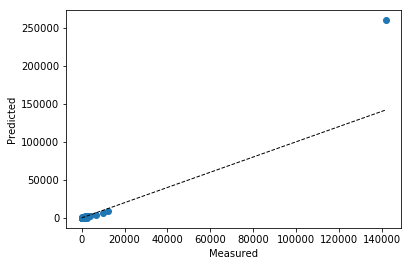

In [228]:
y=data.Property_crime.values
predicted = cross_val_predict(lg, data[['Population', 'Violent_crime']], data['Property_crime'], cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

This model fit better than model 1 but still has big error, cannot predict property crime for New York city.

<h1>Model3: Linear regression for all variables in table</h1>

In [232]:
X = df_cp.drop('Property_crime',axis=1)
y = df_cp.Property_crime
model=lg.fit(X,y)
print ("Regression formula: y = {0}x + {1}".format(model.coef_, model.intercept_))

Regression formula: y = [  1.04149717e-17  -1.02832868e-14  -3.75044606e-14   8.78612620e-15
   2.74652543e-15   1.54787156e-14   1.00000000e+00   1.00000000e+00
   1.00000000e+00]x + 2.2737367544323206e-13


<b>Calculate mean square error:</b>

Mean squared error: 0.00


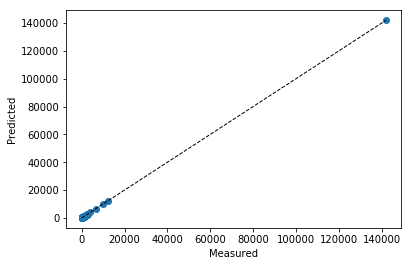

In [230]:
predict=model.predict(X)
print("Mean squared error: %.2f"
      % np.mean((predict - y) ** 2))

predicted = cross_val_predict(lg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

From the result of mean square error, we can see model 3 has less error and best fit the data. 
In formula of model 3, we can see Property crime is the sum of  'Burglary', 'Larceny_theft', 'Motor_vehicle_theft'. Other variables have very minor affect to the output.